# Multiple linear regression model for the prediction of demand for shared bikes
### Problem Statement : 

This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes. 

The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demand

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing numpy and pandas libraries
import pandas as pd
import numpy as np

## Reading and Understanding data

In [3]:
# reading the csv file
bikes = pd.read_csv('day.csv')

In [4]:
# finding shape
bikes.shape

(730, 16)

The dataset contains `16` columns and `730` rows.

In [5]:
# inspecting the data frame
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


we can see there are no null values in all columns.

In [6]:
# to see the dataframe
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


after looking at the dataframe we can drop the columns **instant**, **dteday** (as there are separate columns for year, month and weekday), **atemp** (as there is a column called atemp) and **casual**, **registered** (because, both adding we are getting cnt column)

In [7]:
# dropping the columns
bikes = bikes.drop(columns=['instant','dteday','atemp','casual','registered'])

In [8]:
# looking at the dataframe after dropping
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


as we can see the categorical columns **season**, **mnth**, **weekday**, **weathersit** are in int format, we will change the datatype to object by replacing with the values to their names names for creating **dummy** variables.

In [9]:
# replacing the season column
bikes.season = bikes.season.replace(1,'spring')
bikes.season = bikes.season.replace(2,'summer')
bikes.season = bikes.season.replace(3,'fall')
bikes.season = bikes.season.replace(4,'winter')

In [10]:
# replacing the mnth column
bikes.mnth = bikes.mnth.replace(1,'jan')
bikes.mnth = bikes.mnth.replace(2,'feb')
bikes.mnth = bikes.mnth.replace(3,'mar')
bikes.mnth = bikes.mnth.replace(4,'apr')
bikes.mnth = bikes.mnth.replace(5,'may')
bikes.mnth = bikes.mnth.replace(6,'jun')
bikes.mnth = bikes.mnth.replace(7,'jul')
bikes.mnth = bikes.mnth.replace(8,'aug')
bikes.mnth = bikes.mnth.replace(9,'sep')
bikes.mnth = bikes.mnth.replace(10,'oct')
bikes.mnth = bikes.mnth.replace(11,'nov')
bikes.mnth = bikes.mnth.replace(12,'dec')

In [11]:
# replacing the weekday column
bikes.weekday = bikes.weekday.replace(0,'sun')
bikes.weekday = bikes.weekday.replace(1,'mon')
bikes.weekday = bikes.weekday.replace(2,'tue')
bikes.weekday = bikes.weekday.replace(3,'wed')
bikes.weekday = bikes.weekday.replace(4,'thu')
bikes.weekday = bikes.weekday.replace(5,'fri')
bikes.weekday = bikes.weekday.replace(6,'sat')

In [12]:
# replacing the weathersit column
bikes.weathersit = bikes.weathersit.replace(1,'clear')
bikes.weathersit = bikes.weathersit.replace(2,'mist and cloudy')
bikes.weathersit = bikes.weathersit.replace(3,'light rain and snow')
bikes.weathersit = bikes.weathersit.replace(4,'heavy rain and snow')

In [13]:
# looking at the dataframe after replacing 
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600


In [14]:
# inspecting the columns 
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


we can the datatype of categorical values changed to object

In [15]:
#describing the numerical values
bikes.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000


## Visualising the Data

#### Visualising the numerical variables

In [16]:
#importing the required libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

making pair plot of all numerical variables

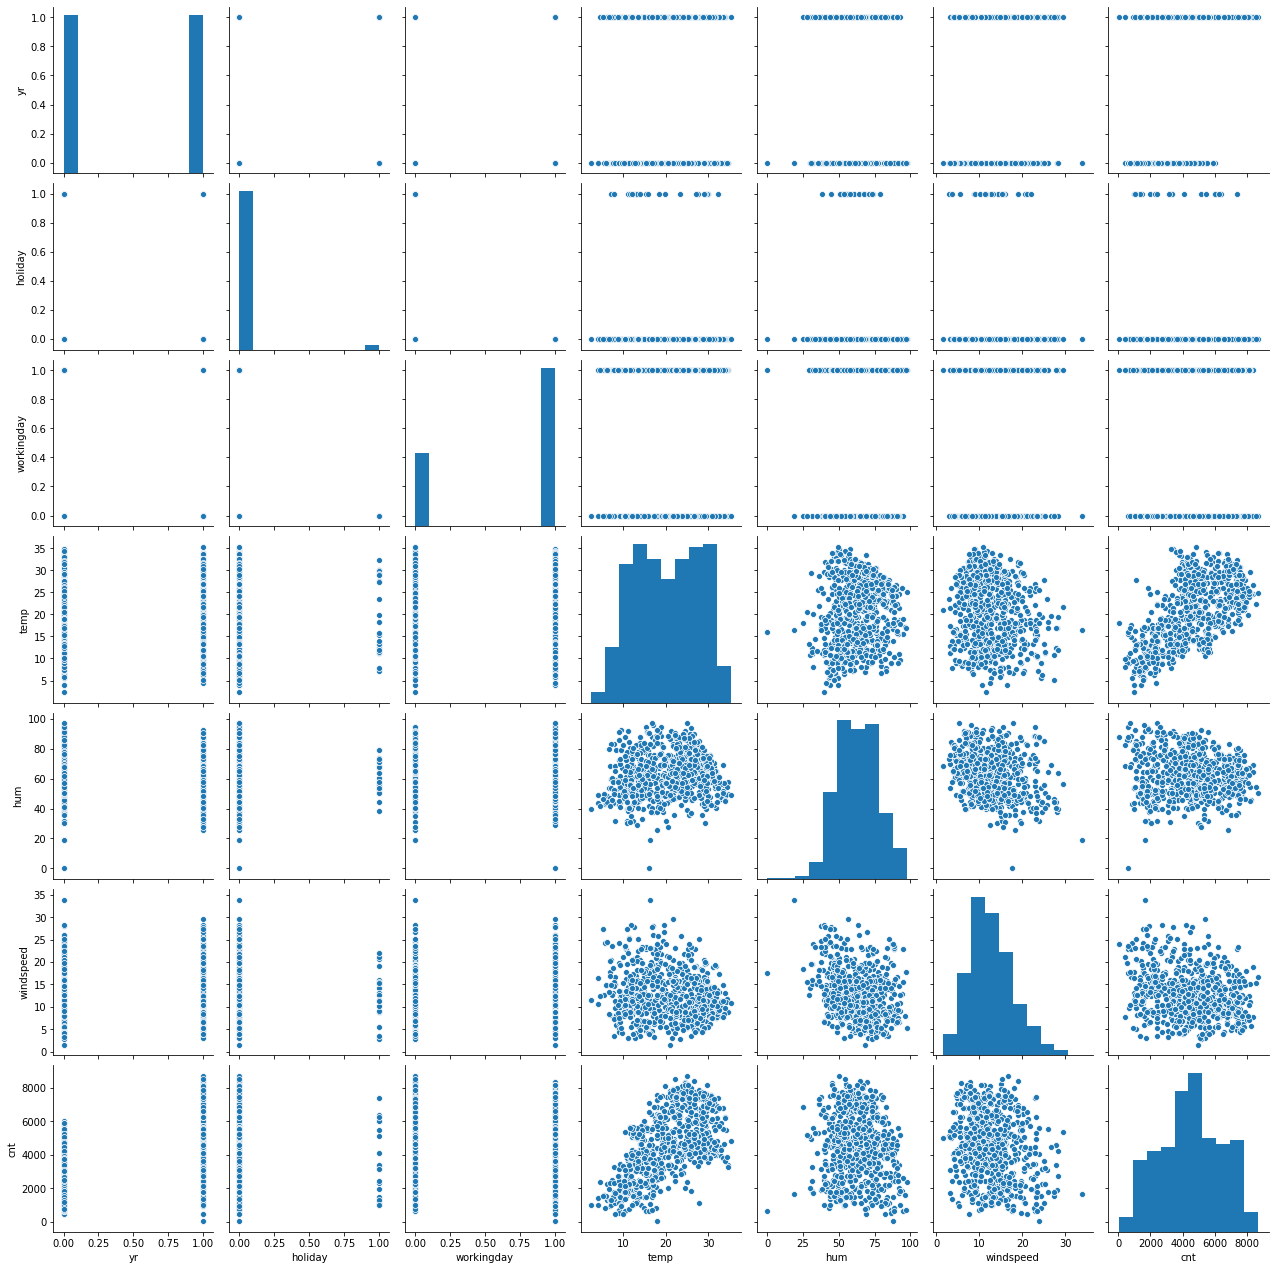

In [17]:
# pairplot of numerical variables
sns.pairplot(bikes)
plt.show()

From the pair plot we can see - 
- Bike demand increased in 2019 than in 2018
- And they are demanding on working day than the holidays and not working days.
- with cnt, temp is positively correlated and hum, wind speed are negatively correlated.

In [18]:
# finding correlation of numerical variables
corre = bikes.corr()
corre

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


plotting the heatmap

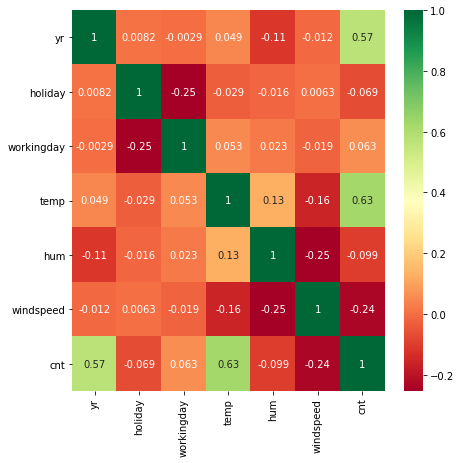

In [19]:
#plotting heatmap
plt.figure(figsize=(7,7))
sns.heatmap(corre,cmap="RdYlGn",annot= True)
plt.show()

With target variable cnt - yr, temp are highly correlated compared to other variables. 

#### Visualising the categorical variables

making the boxplot of these variables

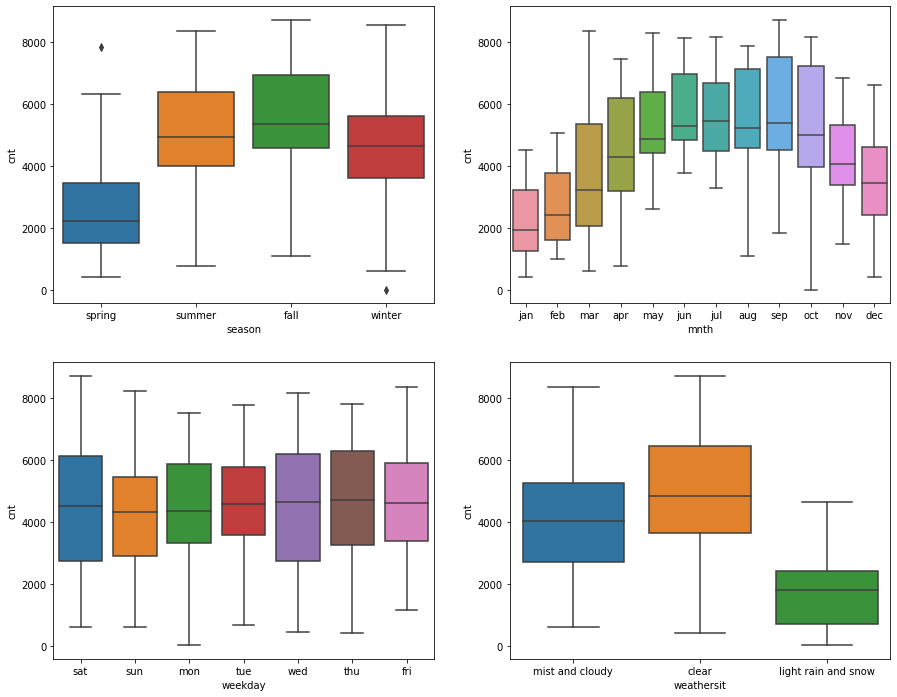

In [20]:
# making subplots
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.show()

-	Season vs cnt – In the fall season demand is high compared to other seasons and in spring the demand is low compared to others.
-	Mnth vs cnt – We can see bikes demand increased upto September and there is sudden decrease in November and December.
-	Weekday vs cnt – Almost all the days median is same.
-	Weathersit vs cnt – When weather is clear we can see the demand of bikes is high, and when it is lighly rainy or snow the count is decreased.

#### Season vs Count with respect to year


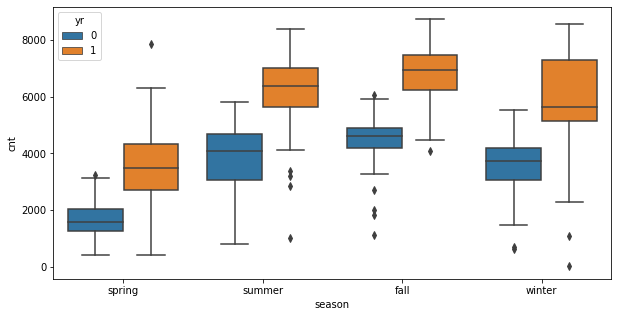

In [21]:
#plotting boxplot
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'yr', data = bikes)
plt.show()

We can see in all the seasons of 2019 bikes are demanding compared to 2018

#### Month vs Count with respect to working day

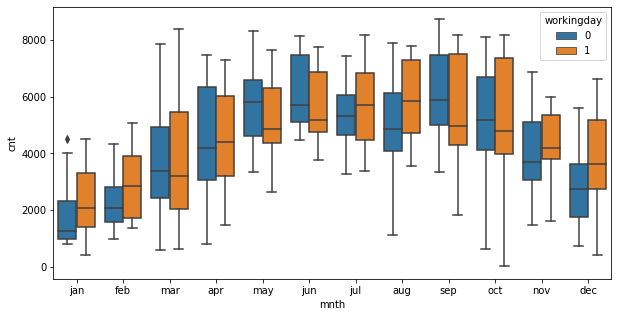

In [22]:
# plotting box plot
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'workingday', data = bikes)
plt.show()

In most of the months bikes are demanding on working day.

## Data Preparation

**creating dummy variables**

As we have four categorical variables wei will create dummy variables for this and convert these levels into integer

**`season`**

In [23]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'status'
status = pd.get_dummies(bikes['season'])

In [24]:
# Check how the dataset 'status' looks like
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


we don't need four columns. we can drop the `fall` column, as the type of season can be identified with just the last three columns where — 
- `001` will correspond to `winter`
- `010` will correspond to `summer`
- `100` will correspond to `spring`
- `000` will correspond to `fall`

In [25]:
#dropping the first column
status = pd.get_dummies(bikes['season'], drop_first = True)

In [26]:
# concating the results to the original dataframe
bikes = pd.concat([bikes, status], axis = 1)

In [27]:
# Drop 'season' as we have created the dummies for it
bikes.drop(['season'], axis = 1, inplace = True)

In [28]:
# after these steps seeing how dataframes looks like
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


**`mnth`**

In [29]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'status1' 
status1 = pd.get_dummies(bikes['mnth'])

In [30]:
# Check how the dataset 'status1' looks like
status1.head()

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


we don't need all 12 columns. we can drop the `april` column, as the type of month can be identified with just the last 11. 
all zeros will correspond to **april**

In [31]:
# dropping the first april column and concating the results to the original dataframe
status1 = pd.get_dummies(bikes['mnth'], drop_first = True)
bikes = pd.concat([bikes, status1], axis = 1)

In [32]:
# Drop 'month' as we have created the dummies for it
bikes.drop(['mnth'], axis = 1, inplace = True)

In [33]:
# after these steps seeing how dataframes looks like
bikes.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,sat,0,mist and cloudy,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist and cloudy,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


**`weekday`**

In [34]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'status2' 
status2 = pd.get_dummies(bikes['weekday'])

In [35]:
# Check how the dataset 'status2' looks like
status2.head()

,fri,mon,sat,sun,thu,tue,wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


we don't need all 7 columns. we can drop the `friday` column, as the type of weekday can be identified with just the last 6. 
all zeros will correspond to **friday**

In [36]:
#repeating the steps as like above variables dropping the column and concatining
status2 = pd.get_dummies(bikes['weekday'], drop_first = True)
bikes = pd.concat([bikes, status2], axis = 1)
bikes.drop(['weekday'], axis = 1, inplace = True)

In [37]:
# after these steps seeing how dataframes looks like
bikes.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,mist and cloudy,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist and cloudy,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


**`weathersit`**

In [38]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status3' 
status3 = pd.get_dummies(bikes['weathersit'])

In [39]:
# Check how the dataset 'status3' looks like
status3.head()

,clear,light rain and snow,mist and cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


we don't need all 3 columns. we can drop the `clear` column, as the type of weekday can be identified with just the last 2. 
all zeros will correspond to **clear**

In [40]:
#repeating the same steps for 'weathersit'
status3 = pd.get_dummies(bikes['weathersit'], drop_first = True)
bikes = pd.concat([bikes, status3], axis = 1)
bikes.drop(['weathersit'], axis = 1, inplace = True)

In [41]:
# after these steps seeing how dataframes looks like
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain and snow,mist and cloudy
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [42]:
#importing train test split and dividing the data frames as train and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the features

it is important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.


#### Normalisation using  min max scaler

In [43]:
# importing min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except the '1,0' and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
# seeing dataframe after scaling
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain and snow,mist and cloudy
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [45]:
#describing df_train
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain and snow,mist and cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

As our target variable is **cnt** we will take that into y

In [46]:
#dividing into X,y
y_train = df_train.pop('cnt')
X_train = df_train

## Building a linear model

#### RFE
Using Recursive feature elimination(RFE) we will select 15 variables to build our model

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE and taking 15 variables
rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [49]:
#checking the 15 variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 5),
 ('nov', False, 2),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', True, 1),
 ('sun', False, 6),
 ('thu', False, 11),
 ('tue', False, 9),
 ('wed', False, 12),
 ('light rain and snow', True, 1),
 ('mist and cloudy', True, 1)]

all the 1's indicating are the 15 variables we got through RFE

In [50]:
# taking all the variables selected into col
col = X_train.columns[rfe.support_]

In [51]:
#looking at the columns which are not showed in RFE
X_train.columns[~rfe.support_]

Index(['aug', 'dec', 'feb', 'jun', 'mar', 'may', 'nov', 'oct', 'mon', 'sun',
       'thu', 'tue', 'wed'],
      dtype='object')

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [55]:
#summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.31e-191
Time:                        22:29:19   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2510    

#### Observations :
- R2 - 0.849 which is a decent one
- jan varibale have high p value with 0.048

#### VIF

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
#checking the columns
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'jan', 'jul', 'sep', 'sat',
       'light rain and snow', 'mist and cloudy'],
      dtype='object')

In [58]:
#removing the constant term as it is not necesary in calculating VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [59]:
#calculating VIF
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.48
7,summer,2.84
14,mist and cloudy,2.29
0,yr,2.09
12,sat,1.98


as we can see VIF values are very high for hum,temp. First we will try dropping the **jan** variable and see VIF again

In [60]:
# building the model by dropping jan variable
X_train_rfe = X_train_rfe.drop(['jan'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.13e-191
Time:                        22:29:20   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2394    

#### Observstions:
- we can see slight change in R2
- holiday varialbe have a p value of 0.028

In [61]:
#again calculating VIF to check is there any change in values after dropping
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
13,mist and cloudy,2.28
0,yr,2.08
11,sat,1.97


 we can see there is no change in VIF values of hum and temp. Againg we try dropping **holiday** and build model

In [62]:
#dropping holiday and building model again
X_train_rfe = X_train_rfe.drop(['holiday'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          8.51e-192
Time:                        22:29:20   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2298    

#### Observations:
- R2 is 0.846
- spring has a p value of 0.006

In [63]:
#calculating VIF again
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.41
2,temp,16.87
1,workingday,4.71
4,windspeed,4.70
5,spring,4.18
7,winter,3.40
6,summer,2.83
12,mist and cloudy,2.28
0,yr,2.08
10,sat,1.84


we can see again there is no change in VIF values of hum and temp. we will try dropping **spring** variable and build model.

In [64]:
# dropping spring variable and building model
X_train_rfe = X_train_rfe.drop(['spring'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.26e-191
Time:                        22:29:21   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1705    

#### Observation:
- R2 value reduced slightly
- p value of jul is 0.014

In [65]:
#dropping constant and calculating VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)


vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.23
2,temp,10.35
1,workingday,4.53
4,windspeed,3.73
11,mist and cloudy,2.10
0,yr,2.03
9,sat,1.79
5,summer,1.76
6,winter,1.71
7,jul,1.55


we can see there is slight decrease in VIF values of `hum` and `temp`, but they are high (>10). Again we will try dropping **jul** and build model

In [66]:
# dropping jul and building model again
X_train_rfe = X_train_rfe.drop(['jul'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.89e-191
Time:                        22:29:21   Log-Likelihood:                 508.45
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     498   BIC:                            -942.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1698    

#### Observation :
- R2 is 0.842
- And P values of all varibles are `0` which is a good thing.

In [67]:
# dropping constant and calculating the VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,15.98
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
10,mist and cloudy,2.10
0,yr,2.02
8,sat,1.79
6,winter,1.66
5,summer,1.58
7,sep,1.20


We can see again slight decrease in VIF values of hum and temp. But they are very high. The high value of `hum VIF` indicates the most of the variance in hum can be explained by rest of the variables. So, we we will drop **hum** variable and try building model again.

In [68]:
#dropping hum variable and building the model
X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.47e-188
Time:                        22:29:21   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0753    

#### Observations :
- R2 is 0.836 
- And again P values of all variables are `0`

In [69]:
#calculating VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,yr,2.02
7,sat,1.69
4,summer,1.57
9,mist and cloudy,1.53
5,winter,1.40
6,sep,1.20
8,light rain and snow,1.08


##### We can clearly see all the VIF values are less than 5 (and this shows there is no multicollinearity) and all P values are 0 . So we can take this as our final model

## Residual Analysis of the train data

Now we will check if the error terms are normally distributed or not (which is infact, one of the major assumptions of linear regression) and plot the histogram of the error terms.

In [70]:
#Predicting the cnt using our final model
y_train_cnt = lm.predict(X_train_rfe)

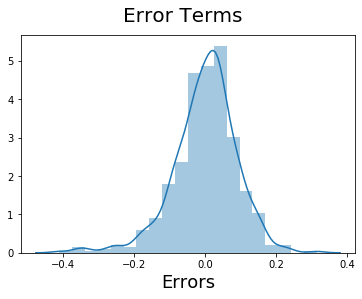

In [71]:
#plotting the histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)         
plt.xlabel('Errors', fontsize = 18) 
plt.show()

## Making Predictions Using the Final Model

#### Applying Scaling on test sets

In [72]:
#taking continous variables and transforming them
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [73]:
#checking the data after scaling
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain and snow,mist and cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [74]:
#dividing dataframe into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
#taking the columns of final model
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [76]:
#predicting using built model
y_pred = lm.predict(X_test_new)

## Model Evaluation

plotting the graph for actual versus predicted values.

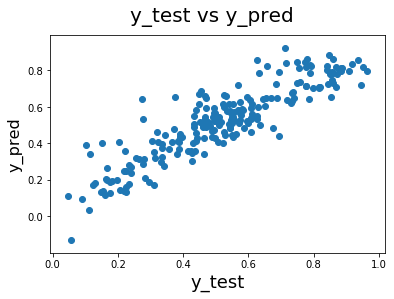

In [77]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

We can see that the equation of our best fitted line is:


$ cnt = 0.0753 + 0.2331\times yr + 0.0563  \times workingday + 0.5499 \times temp - 0.1552 \times windspeed + 0.0874 \times summer + 0.1318 \times winter + 0.0972 \times sep + 0.0677 \times sat - 0.2880 \times light rain and snow - 0.0813 \times mist and cloudy $

Top 3 features contributing significantly towards explaining the demand of the shared bikes (cnt) are:
1.	Temp – one unit increase in temperature, cnt will increase by 0.5499
2.	Light rain and snow – this variable will take 0 or 1, if light rain and snow is 1 then cnt will be decreased by 0.2880. This show there may be a decrease of shared bikes if it is   lightly raining or snow.
3.	Yr – this variable also takes value of 0,1, if yr is 1 (i.e. 2019) the cnt is increased by 0.2331.




Overall we have a decent model.

## calculate the R-squared score on the test set.

In [78]:
#importing r2_score
from sklearn.metrics import r2_score

In [79]:
#claculating R2 of the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7955844377237248

#### R squared of trained model is `83.60%` and R squared of test set is  `79.55%`. Which shows model built is stable.